In [2]:
%pip install dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 12.4 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dlib: filename=dlib-19.24.4-cp311-cp311-macosx_14_0_arm64.whl size=2933434 sha256=6b18a707410d48b8dc3c5becea084f4a3a79fdbf741e0e3deb5f4fab1b172b3a
  Stored in directory: /Users/sukanya/Library/Caches/pip/wheels/0d/98/d7/6152ef60cc9ecd8e1cbf5aa31c55cb5ecd1a737f1a1cf451bf
Successfully built dlib
Note: you may need to restart the kernel to use updated packages.


In [20]:
import dlib
import requests
from PIL import Image, ImageDraw
from io import BytesIO
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [4]:
# Loading the Dlib face detector
detector = dlib.get_frontal_face_detector()

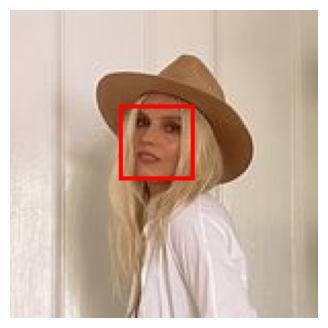

In [30]:
# Testing an image
def detect_faces_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    gray = img.convert('L')
    img_array = np.array(gray)

    # Detect faces in the image
    faces = detector(img_array, 1)

    # Draw rectangles around detected faces
    for face in faces:
        left, top, right, bottom = face.left(), face.top(), face.right(), face.bottom()
        draw = ImageDraw.Draw(img)
        draw.rectangle(((left, top), (right, bottom)), outline="red", width=2)

    return img

# Example URL of an image
url = "https://scontent-lga3-2.cdninstagram.com/v/t51.2885-19/299311570_5576276315725149_308615003201747998_n.jpg?stp=dst-jpg_e0_s150x150&_nc_ht=scontent-lga3-2.cdninstagram.com&_nc_cat=109&_nc_ohc=GM3GvDy_99gQ7kNvgHvAe-3&edm=AOQ1c0wBAAAA&ccb=7-5&oh=00_AYAFnsqSxeozOFtfcciVgMRDYo47ElHdwISx6wp9zsw3Pw&oe=66717D58&_nc_sid=8b3546"
# Detect faces in the image from the URL
detected_img = detect_faces_from_url(url)

# Display the image with detected faces
if detected_img:
    plt.figure(figsize=(4, 4))
    plt.imshow(detected_img)
    plt.axis('off') 
    plt.show()

In [32]:

def detect_faces_and_predict(url, model):
    try:
        # Get the image from the URL
        response = requests.get(url)
        response.raise_for_status()  # Raise an HTTPError if the HTTP request returned an unsuccessful status code
        img = Image.open(BytesIO(response.content))

        # Convert the image to grayscale
        gray = img.convert('L')

        # Convert the image to a numpy array
        img_array = np.array(gray)

        # Detect faces in the image
        faces = detector(img_array, 1)

        if not faces:
            print("No faces detected.")
            return

        # Process each detected face
        for i, face in enumerate(faces):
            left, top, right, bottom = face.left(), face.top(), face.right(), face.bottom()

            # Crop the detected face
            face_img = img.crop((left, top, right, bottom))

            # Resize the image to the input size required by your CNN model
            face_img = face_img.resize((model.input_shape[1], model.input_shape[2]))

            # Convert the image to an array and preprocess it as required by your model
            face_array = np.array(face_img)
            face_array = face_array.astype('float32') / 255.0  # Normalize if required
            face_array = np.expand_dims(face_array, axis=0)  # Add batch dimension

            # Make predictions
            predictions = model.predict(face_array)
            predicted_value = predictions[0, 0]

            print(f"Face {i + 1}:")
            print(f"Image URL: {url}, Predicted value: {predicted_value:.4f}")

            threshold = 0.5
            if predicted_value > threshold:
                print("Prediction: This is a male")
            else:
                print("Prediction: This is a female")

            # Plot the face image with the prediction
            plt.figure()
            plt.imshow(face_img)
            plt.axis('off')
            plt.title(f"Predicted value: {predicted_value:.4f}")
            plt.show()

    except requests.exceptions.RequestException as e:
        print(f"Error fetching image from URL: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example URL of an image
url = "https://scontent-gru1-2.cdninstagram.com/v/t51.2885-19/412613419_770953751508615_8871339578053890234_n.jpg?stp=dst-jpg_e0_s150x150&_nc_ht=scontent-gru1-2.cdninstagram.com&_nc_cat=103&_nc_ohc=6az047QNUywQ7kNvgEgMY8N&edm=AOQ1c0wBAAAA&ccb=7-5&oh=00_AYDxjUcas7Pp6IWVE8gC0XadHrkEUWHeD-u_urXx9ceo4g&oe=66716D78&_nc_sid=8b3546"

# Load your pre-trained CNN model
# Replace 'your_model.h5' with the path to your trained model
model = load_model('/Users/sukanya/Desktop/Gender Classification/Code/CNN.h5')

# Detect faces and make predictions
detect_faces_and_predict(url, model)

No faces detected.


In [27]:
url = "https://scontent-man2-1.cdninstagram.com/v/t51.2885-19/337282432_789153598971601_765200453496137519_n.jpg?stp=dst-jpg_e0_s150x150&_nc_ht=scontent-man2-1.cdninstagram.com&_nc_cat=101&_nc_ohc=-VUQ1mGo82AQ7kNvgEgG0_B&edm=AOQ1c0wBAAAA&ccb=7-5&oh=00_AYDMyieCL9XcWCQ6o_em3YesgUIA_1MV5ScXHv5-GaF7pg&oe=6671780D&_nc_sid=8b3546"
detect_faces_and_predict(url, model)

None
